In [1]:
%matplotlib inline

import os
import ast
import csv
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.linalg import expm

use_latex = True # Set to True to use LaTeX for text rendering
save_figs = True  # Save figures

In [2]:
if use_latex:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": 'Computer Modern Roman'
    })
    
if save_figs:
    figures_directory = '../figs'
    if not os.path.exists(figures_directory):
        os.makedirs(figures_directory)
        print(f"The directory '{figures_directory}' was created.")
    figures_Directory = '../figs/diff_F'
    if not os.path.exists(figures_Directory):
        os.makedirs(figures_Directory)
        print(f"The Directory '{figures_Directory}' was created.")

In [3]:
# Mine
data_x_true = pd.read_csv('../data/data_x_true.csv')
data_F = pd.read_csv('../data/data_F.csv')
data_STM = pd.read_csv('../data/data_STM.csv')

# GMAT
data_gmat_x_true = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_x_true.csv')
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# ODTBX
data_odtbx_x_true = scipy.io.loadmat('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_odtbx/data_odtbx_x_true.mat')
data_odtbx_F = scipy.io.loadmat('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_odtbx/data_odtbx_F.mat')

# TudatPy
data_tudatpy_x_true = pd.read_csv('../data/data_tudatpy/data_tudatpy_x_true.csv')
data_tudatpy_STM = pd.read_csv('../data/data_tudatpy/data_tudatpy_STM.csv')

# Time 
t = data_gmat_x_true['Chief1.A1ModJulian']
t = (t - t.iloc[0]) * 24 * 60 / 60

In [4]:
def convert_to_matrix(cell):
    values = list(map(float, cell.split()))
    matrix = np.array(values).reshape(6, 6)
    return matrix
data_F = data_F.map(convert_to_matrix, na_action=None)
data_F.head()

,F_chief,F_deputy1,F_deputy2,F_deputy3
0,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
1,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
2,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
3,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
4,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."


In [5]:
data_odtbx_F

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 16 18:23:51 2024',
 '__version__': '1.0',
 '__globals__': [],
 'chief': array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
         [-1.04741059e-06,  8.59150723e-08, -6.30912494e-07,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 8.59150723e-08, -1.10556593e-06, -4.52580927e-07,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-6.30912494e-07, -4.52580927e-07,  2.15291105e-06,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00,  0.00000000e+00,  0.000

In [6]:
data_STM = data_STM.map(convert_to_matrix, na_action=None)
data_STM.head()

,STM_chief,STM_deputy1,STM_deputy2,STM_deputy3
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0...."
1,"[[0.9981689340392839, 0.0001716181166602827, -...","[[0.9978890686005438, -0.0001351134166097872, ...","[[1.0003343271424805, -0.0009485976280966405, ...","[[0.9985127681111573, 0.001088848762807559, 0...."
2,"[[0.992931429321276, 0.0007531554079709035, -0...","[[0.9915595181125576, -0.00046669568062708517,...","[[1.0017690843568405, -0.004036717238945539, 0...","[[0.9939972708641485, 0.004171840121447662, 0...."
3,"[[0.984756081272497, 0.0018422824453710744, -0...","[[0.9810311740950727, -0.0008844479120567907, ...","[[1.00497649326085, -0.009641013665434633, 0.0...","[[0.9863853717230512, 0.008980723033579177, 0...."
4,"[[0.974220147265364, 0.0035339502300659837, -0...","[[0.9663437654953976, -0.0012781802617262772, ...","[[1.010655575572761, -0.018151253456853342, 0....","[[0.9756259359635584, 0.01525892052749737, 0.0..."


In [7]:
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# Function to split and convert string to list of floats
def safe_split(cell):
    return [float(i) for i in cell.split()]

# Applying the safe_split function directly
data_gmat_STM['Chief1.OrbitSTM'] = data_gmat_STM['Chief1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy1.OrbitSTM'] = data_gmat_STM['Deputy1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy2.OrbitSTM'] = data_gmat_STM['Deputy2.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy3.OrbitSTM'] = data_gmat_STM['Deputy3.OrbitSTM'].apply(safe_split)

# Convert the list of floats to a numpy array and reshape to 6x6 matrix
def to_matrix(data, col_name):
    matrices = []
    for i in range(0, len(data), 6):
        concatenated = sum(data[col_name][i:i+6], [])
        matrix = np.array(concatenated).reshape(6, 6)
        matrices.append(matrix)
    return matrices

# Applying the conversion function for each set of columns
data_gmat_STM = pd.DataFrame({
    'Chief1.OrbitSTM': to_matrix(data_gmat_STM, 'Chief1.OrbitSTM'),
    'Deputy1.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy1.OrbitSTM'),
    'Deputy2.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy2.OrbitSTM'),
    'Deputy3.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy3.OrbitSTM')
})
data_gmat_STM.tail()

,Chief1.OrbitSTM,Deputy1.OrbitSTM,Deputy2.OrbitSTM,Deputy3.OrbitSTM
356,"[[5.033967427829067, 2.558728373950799, -18.77...","[[-0.4820879731899905, 5.10578939368259, -1.25...","[[-12.7958608295038, 4.582400347071284, -16.14...","[[-8.37967105886101, -13.86315615955255, -19.8..."
357,"[[4.127162872879953, 1.986002378239594, -14.57...","[[-0.4127047327508555, 4.6089214260185, -1.136...","[[-15.10371713181291, 5.505631441983876, -18.9...","[[-8.304017349371179, -13.84533852227541, -19...."
358,"[[3.208145463686218, 1.400522995120938, -10.27...","[[-0.3413539369100414, 4.089704560601627, -1.0...","[[-17.35677148600793, 6.406926503142095, -21.7...","[[-8.193030188416559, -13.76835308993342, -19...."
359,"[[2.281300134653826, 0.8047813870114813, -5.90...","[[-0.2683194031816073, 3.550201464658623, -0.8...","[[-19.54475561722349, 7.282202251290807, -24.4...","[[-8.046885103085279, -13.63188233401249, -19...."
360,"[[1.350994294386029, 0.2013411350296008, -1.47...","[[-0.1938932062183611, 2.992570853831222, -0.7...","[[-21.6577033871629, 8.127516330483436, -27.04...","[[-7.865916949873081, -13.43587645154596, -19...."


In [8]:
# Function to convert a JSON-like string to a numpy array
def string_to_matrix(matrix_str):
    return np.array(ast.literal_eval(matrix_str))

data_tudatpy_STM = {
    'STM_chief': [],
    'STM_deputy1': [],
    'STM_deputy2': [],
    'STM_deputy3': []
}

with open('../data/data_tudatpy/data_tudatpy_STM.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data_tudatpy_STM['STM_chief'].append(string_to_matrix(row['STM_chief']))
        data_tudatpy_STM['STM_deputy1'].append(string_to_matrix(row['STM_deputy1']))
        data_tudatpy_STM['STM_deputy2'].append(string_to_matrix(row['STM_deputy2']))
        data_tudatpy_STM['STM_deputy3'].append(string_to_matrix(row['STM_deputy3']))

    
data_tudatpy_STM = pd.DataFrame(data_tudatpy_STM)
data_tudatpy_STM.tail()

,STM_chief,STM_deputy1,STM_deputy2,STM_deputy3
356,"[[5.033948156482169, 2.558714760150921, -18.77...","[[-0.4820876420290754, 5.105834583635459, -1.2...","[[-12.795779627016886, 4.5823645426820825, -16...","[[-8.379685675302394, -13.863170749140547, -19..."
357,"[[4.127143456063918, 1.9859889386937448, -14.5...","[[-0.41270433155067054, 4.608967741711694, -1....","[[-15.103635844284758, 5.505595236871914, -18....","[[-8.304034307098457, -13.84535693837679, -19...."
358,"[[3.2081260105661364, 1.40050979885538, -10.27...","[[-0.34135346772662994, 4.089751831139931, -1....","[[-17.356690494600464, 6.406890062955084, -21....","[[-8.193049441958175, -13.76837530760985, -19...."
359,"[[2.2812807557621286, 0.8047685039774939, -5.9...","[[-0.26831886833186547, 3.5502495141642663, -0...","[[-19.544675300515134, 7.282165741752241, -24....","[[-8.04690659374442, -13.631908306442817, -19...."
360,"[[1.350975100347115, 0.20132863543772206, -1.4...","[[-0.19389260825207083, 2.9926195018340733, -0...","[[-21.657624119016784, 8.127479916478691, -27....","[[-7.865940606008617, -13.435906110094825, -19..."


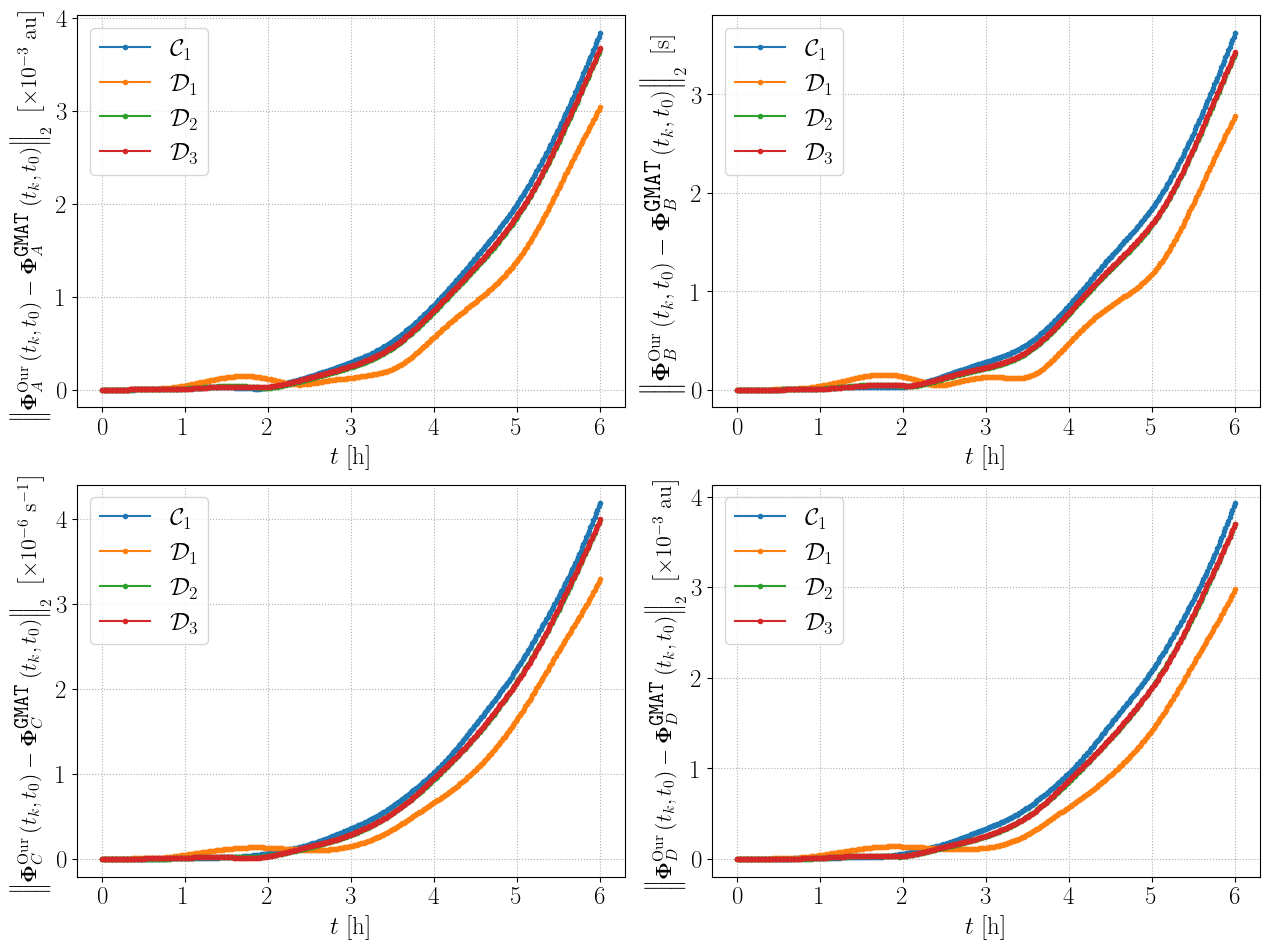

In [9]:
dev_STMA_chief, dev_STMB_chief, dev_STMC_chief, dev_STMD_chief = [], [], [], []
dev_STMA_deputy1, dev_STMB_deputy1, dev_STMC_deputy1, dev_STMD_deputy1 = [], [], [], []
dev_STMA_deputy2, dev_STMB_deputy2, dev_STMC_deputy2, dev_STMD_deputy2 = [], [], [], []
dev_STMA_deputy3, dev_STMB_deputy3, dev_STMC_deputy3, dev_STMD_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_STMA_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][0:3, 0:3] - data_gmat_STM['Chief1.OrbitSTM'][idx][0:3, 0:3], ord=2))
    dev_STMB_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][0:3, 3:6] - data_gmat_STM['Chief1.OrbitSTM'][idx][0:3, 3:6], ord=2))
    dev_STMC_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][3:6, 0:3] - data_gmat_STM['Chief1.OrbitSTM'][idx][3:6, 0:3], ord=2))
    dev_STMD_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][3:6, 3:6] - data_gmat_STM['Chief1.OrbitSTM'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][0:3, 0:3] - data_gmat_STM['Deputy1.OrbitSTM'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][0:3, 3:6] - data_gmat_STM['Deputy1.OrbitSTM'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][3:6, 0:3] - data_gmat_STM['Deputy1.OrbitSTM'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][3:6, 3:6] - data_gmat_STM['Deputy1.OrbitSTM'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][0:3, 0:3] - data_gmat_STM['Deputy2.OrbitSTM'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][0:3, 3:6] - data_gmat_STM['Deputy2.OrbitSTM'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][3:6, 0:3] - data_gmat_STM['Deputy2.OrbitSTM'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][3:6, 3:6] - data_gmat_STM['Deputy2.OrbitSTM'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][0:3, 0:3] - data_gmat_STM['Deputy3.OrbitSTM'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][0:3, 3:6] - data_gmat_STM['Deputy3.OrbitSTM'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][3:6, 0:3] - data_gmat_STM['Deputy3.OrbitSTM'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][3:6, 3:6] - data_gmat_STM['Deputy3.OrbitSTM'][idx][3:6, 3:6], ord=2))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 2, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks
    
# Plot submatrix errors
axs[0, 0].plot(t, np.array(dev_STMA_chief) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy1) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy2) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy3) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[0, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 0].set_ylabel("$\left\|\mathbf{\Phi}_A^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_A^\\texttt{GMAT} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-3} \ \mathrm{au}\\right]$", fontsize=16)
axs[0, 0].grid(linestyle=':')
axs[0, 0].legend(fontsize=18)

axs[0, 1].plot(t, dev_STMB_chief, '.-', label='$\mathcal{C}_1$')
axs[0, 1].plot(t, dev_STMB_deputy1, '.-', label='$\mathcal{D}_1$')
axs[0, 1].plot(t, dev_STMB_deputy2, '.-', label='$\mathcal{D}_2$')
axs[0, 1].plot(t, dev_STMB_deputy3, '.-', label='$\mathcal{D}_3$')
axs[0, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 1].set_ylabel("$\left\|\mathbf{\Phi}_B^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_B^\\texttt{GMAT} \left(t_k, t_0\\right)\\right\|_2 \ \left[\mathrm{s}\\right]$", fontsize=18)
axs[0, 1].grid(linestyle=':')
axs[0, 1].legend(fontsize=18)

axs[1, 0].plot(t, np.array(dev_STMC_chief) * 1e6, '.-', label='$\mathcal{C}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy1) * 1e6, '.-', label='$\mathcal{D}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy2) * 1e6, '.-', label='$\mathcal{D}_2$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy3) * 1e6, '.-', label='$\mathcal{D}_3$')
axs[1, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 0].set_ylabel("$\left\|\mathbf{\Phi}_C^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_C^\\texttt{GMAT} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-6} \ \mathrm{s}^{-1}\\right]$", fontsize=16)
axs[1, 0].grid(linestyle=':')
axs[1, 0].legend(fontsize=18)

axs[1, 1].plot(t, np.array(dev_STMD_chief) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy1) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy2) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy3) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[1, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 1].set_ylabel("$\left\|\mathbf{\Phi}_D^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_D^\\texttt{GMAT} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-3} \ \mathrm{au}\\right]$", fontsize=16)
axs[1, 1].grid(linestyle=':')
axs[1, 1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_gmat.png', dpi=300)
plt.show()

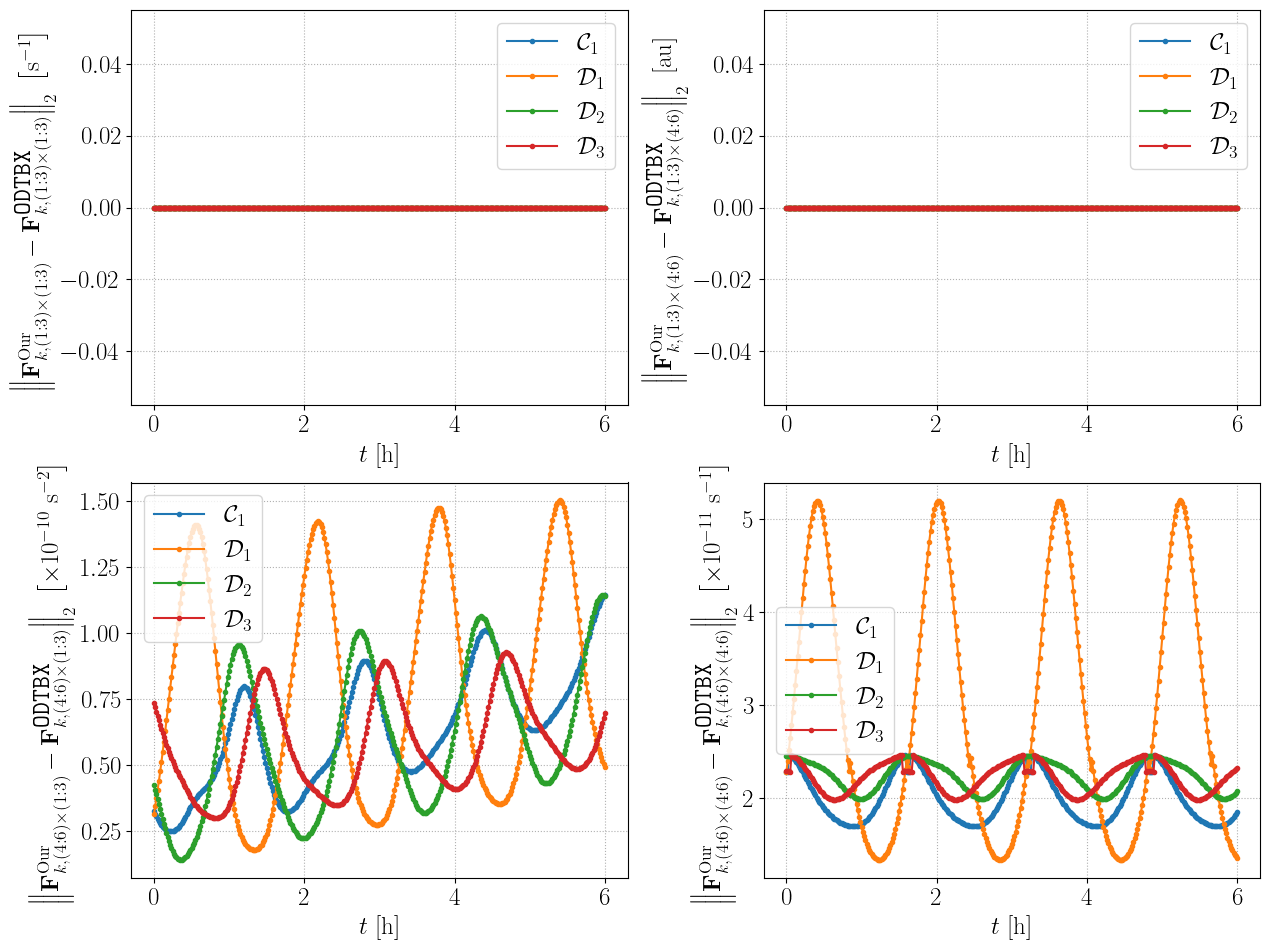

In [10]:
dev_F_A_chief, dev_F_B_chief, dev_F_C_chief, dev_F_D_chief = [], [], [], []
dev_F_A_deputy1, dev_F_B_deputy1, dev_F_C_deputy1, dev_F_D_deputy1 = [], [], [], []
dev_F_A_deputy2, dev_F_B_deputy2, dev_F_C_deputy2, dev_F_D_deputy2 = [], [], [], []
dev_F_A_deputy3, dev_F_B_deputy3, dev_F_C_deputy3, dev_F_D_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_F_A_chief.append(np.linalg.norm(data_F['F_chief'][idx][0:3, 0:3] - data_odtbx_F['chief'][idx, 0:3, 0:3], ord=2))
    dev_F_B_chief.append(np.linalg.norm(data_F['F_chief'][idx][0:3, 3:6] - data_odtbx_F['chief'][idx, 0:3, 3:6], ord=2))
    dev_F_C_chief.append(np.linalg.norm(data_F['F_chief'][idx][3:6, 0:3] - data_odtbx_F['chief'][idx, 3:6, 0:3], ord=2))
    dev_F_D_chief.append(np.linalg.norm(data_F['F_chief'][idx][3:6, 3:6] - data_odtbx_F['chief'][idx, 3:6, 3:6], ord=2))
    
    dev_F_A_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][0:3, 0:3] - data_odtbx_F['deputy1'][idx, 0:3, 0:3], ord=2))
    dev_F_B_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][0:3, 3:6] - data_odtbx_F['deputy1'][idx, 0:3, 3:6], ord=2))
    dev_F_C_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][3:6, 0:3] - data_odtbx_F['deputy1'][idx, 3:6, 0:3], ord=2))
    dev_F_D_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][3:6, 3:6] - data_odtbx_F['deputy1'][idx, 3:6, 3:6], ord=2))
    
    dev_F_A_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][0:3, 0:3] - data_odtbx_F['deputy2'][idx, 0:3, 0:3], ord=2))
    dev_F_B_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][0:3, 3:6] - data_odtbx_F['deputy2'][idx, 0:3, 3:6], ord=2))
    dev_F_C_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][3:6, 0:3] - data_odtbx_F['deputy2'][idx, 3:6, 0:3], ord=2))
    dev_F_D_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][3:6, 3:6] - data_odtbx_F['deputy2'][idx, 3:6, 3:6], ord=2))
    
    dev_F_A_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][0:3, 0:3] - data_odtbx_F['deputy3'][idx, 0:3, 0:3], ord=2))
    dev_F_B_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][0:3, 3:6] - data_odtbx_F['deputy3'][idx, 0:3, 3:6], ord=2))
    dev_F_C_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][3:6, 0:3] - data_odtbx_F['deputy3'][idx, 3:6, 0:3], ord=2))
    dev_F_D_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][3:6, 3:6] - data_odtbx_F['deputy3'][idx, 3:6, 3:6], ord=2))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 2, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot submatrix errors
axs[0, 0].plot(t, np.array(dev_F_A_chief), '.-', label='$\mathcal{C}_1$')
axs[0, 0].plot(t, np.array(dev_F_A_deputy1), '.-', label='$\mathcal{D}_1$')
axs[0, 0].plot(t, np.array(dev_F_A_deputy2), '.-', label='$\mathcal{D}_2$')
axs[0, 0].plot(t, np.array(dev_F_A_deputy3), '.-', label='$\mathcal{D}_3$')
axs[0, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 0].set_ylabel("$\left\|\mathbf{F}_{k, (1:3) \\times (1:3)}^\mathrm{Our} - \mathbf{F}_{k, (1:3) \\times (1:3)}^\\texttt{ODTBX}\\right\|_2 \ \left[\mathrm{s}^{-1}\\right]$", fontsize=18)
axs[0, 0].grid(linestyle=':')
axs[0, 0].legend(fontsize=18)

axs[0, 1].plot(t, np.array(dev_F_B_chief), '.-', label='$\mathcal{C}_1$')
axs[0, 1].plot(t, np.array(dev_F_B_deputy1), '.-', label='$\mathcal{D}_1$')
axs[0, 1].plot(t, np.array(dev_F_B_deputy2), '.-', label='$\mathcal{D}_2$')
axs[0, 1].plot(t, np.array(dev_F_B_deputy3), '.-', label='$\mathcal{D}_3$')
axs[0, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 1].set_ylabel("$\left\|\mathbf{F}_{k, (1:3) \\times (4:6)}^\mathrm{Our} - \mathbf{F}_{k, (1:3) \\times (4:6)}^\\texttt{ODTBX}\\right\|_2 \ \left[\mathrm{au}\\right]$", fontsize=18)
axs[0, 1].grid(linestyle=':')
axs[0, 1].legend(fontsize=18)

axs[1, 0].plot(t, np.array(dev_F_C_chief) * 1e10, '.-', label='$\mathcal{C}_1$')
axs[1, 0].plot(t, np.array(dev_F_C_deputy1) * 1e10, '.-', label='$\mathcal{D}_1$')
axs[1, 0].plot(t, np.array(dev_F_C_deputy2) * 1e10, '.-', label='$\mathcal{D}_2$')
axs[1, 0].plot(t, np.array(dev_F_C_deputy3) * 1e10, '.-', label='$\mathcal{D}_3$')
axs[1, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 0].set_ylabel("$\left\|\mathbf{F}_{k, (4:6) \\times (1:3)}^\mathrm{Our} - \mathbf{F}_{k, (4:6) \\times (1:3)}^\\texttt{ODTBX}\\right\|_2 \ \left[\\times 10^{-10} \ \mathrm{s}^{-2}\\right]$", fontsize=18)
axs[1, 0].grid(linestyle=':')
axs[1, 0].legend(fontsize=18)

axs[1, 1].plot(t, np.array(dev_F_D_chief) * 1e11, '.-', label='$\mathcal{C}_1$')
axs[1, 1].plot(t, np.array(dev_F_D_deputy1) * 1e11, '.-', label='$\mathcal{D}_1$')
axs[1, 1].plot(t, np.array(dev_F_D_deputy2) * 1e11, '.-', label='$\mathcal{D}_2$')
axs[1, 1].plot(t, np.array(dev_F_D_deputy3) * 1e11, '.-', label='$\mathcal{D}_3$')
axs[1, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 1].set_ylabel("$\left\|\mathbf{F}_{k, (4:6) \\times (4:6)}^\mathrm{Our} - \mathbf{F}_{k, (4:6) \\times (4:6)}^\\texttt{ODTBX}\\right\|_2 \ \left[\\times 10^{-11} \ \mathrm{s}^{-1}\\right]$", fontsize=18)
axs[1, 1].grid(linestyle=':')
axs[1, 1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/F_test_odtbx.png', dpi=300)
plt.show()

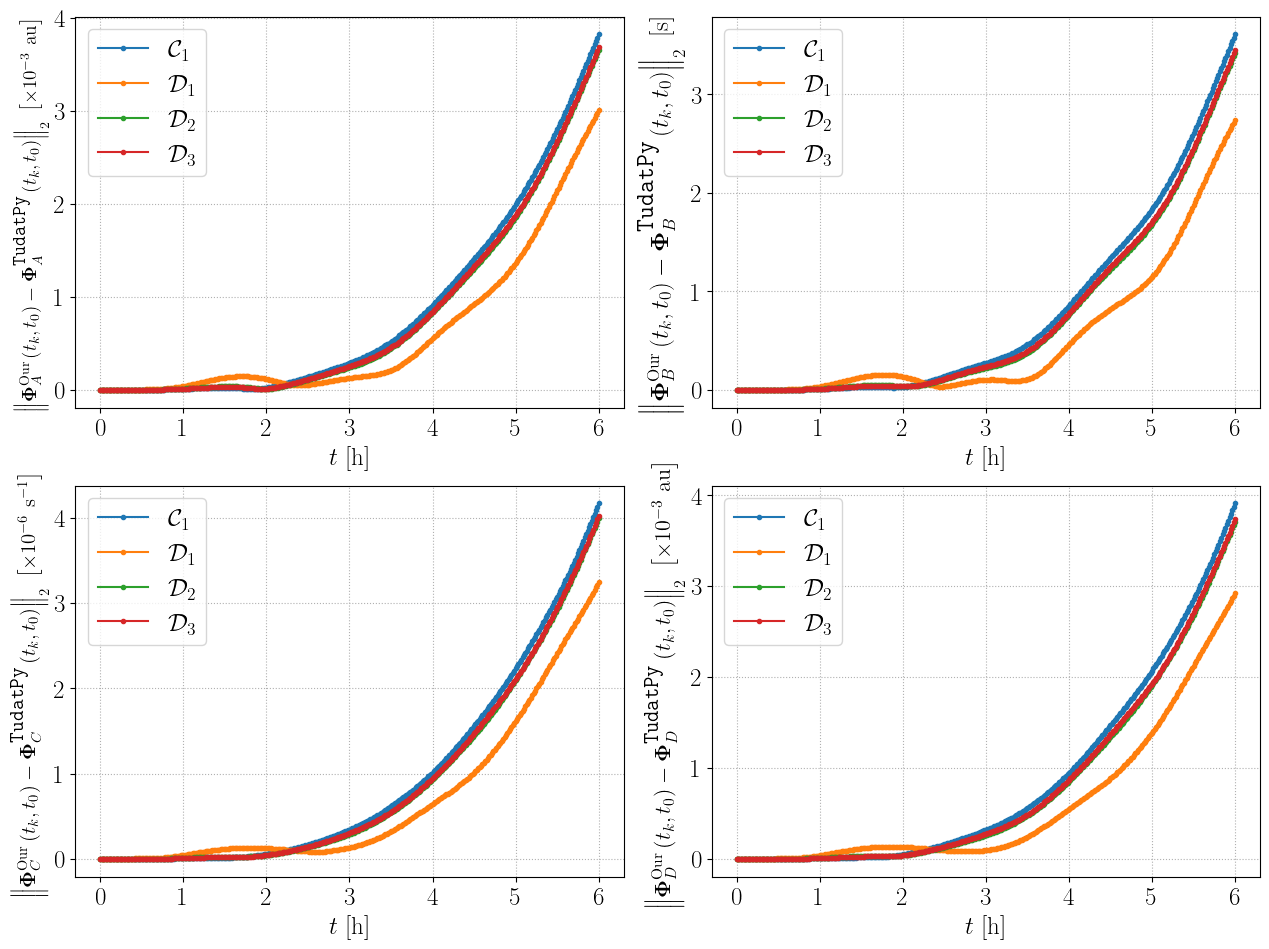

In [13]:
dev_STMA_chief, dev_STMB_chief, dev_STMC_chief, dev_STMD_chief = [], [], [], []
dev_STMA_deputy1, dev_STMB_deputy1, dev_STMC_deputy1, dev_STMD_deputy1 = [], [], [], []
dev_STMA_deputy2, dev_STMB_deputy2, dev_STMC_deputy2, dev_STMD_deputy2 = [], [], [], []
dev_STMA_deputy3, dev_STMB_deputy3, dev_STMC_deputy3, dev_STMD_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_STMA_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][0:3, 0:3] - data_tudatpy_STM['STM_chief'][idx][0:3, 0:3], ord=2))
    dev_STMB_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][0:3, 3:6] - data_tudatpy_STM['STM_chief'][idx][0:3, 3:6], ord=2))
    dev_STMC_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][3:6, 0:3] - data_tudatpy_STM['STM_chief'][idx][3:6, 0:3], ord=2))
    dev_STMD_chief.append(np.linalg.norm(data_STM['STM_chief'][idx][3:6, 3:6] - data_tudatpy_STM['STM_chief'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy1'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy1'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy1'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy1.append(np.linalg.norm(data_STM['STM_deputy1'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy1'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy2'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy2'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy2'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy2.append(np.linalg.norm(data_STM['STM_deputy2'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy2'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy3'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy3'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy3'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy3.append(np.linalg.norm(data_STM['STM_deputy3'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy3'][idx][3:6, 3:6], ord=2))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 2, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks
    
# Plot submatrix errors
axs[0, 0].plot(t, np.array(dev_STMA_chief) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy1) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy2) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy3) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[0, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 0].set_ylabel("$\left\|\mathbf{\Phi}_A^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_A^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-3} \ \mathrm{au}\\right]$", fontsize=14)
axs[0, 0].grid(linestyle=':')
axs[0, 0].legend(fontsize=18)

axs[0, 1].plot(t, dev_STMB_chief, '.-', label='$\mathcal{C}_1$')
axs[0, 1].plot(t, dev_STMB_deputy1, '.-', label='$\mathcal{D}_1$')
axs[0, 1].plot(t, dev_STMB_deputy2, '.-', label='$\mathcal{D}_2$')
axs[0, 1].plot(t, dev_STMB_deputy3, '.-', label='$\mathcal{D}_3$')
axs[0, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 1].set_ylabel("$\left\|\mathbf{\Phi}_B^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_B^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\mathrm{s}\\right]$", fontsize=18)
axs[0, 1].grid(linestyle=':')
axs[0, 1].legend(fontsize=18)

axs[1, 0].plot(t, np.array(dev_STMC_chief) * 1e6, '.-', label='$\mathcal{C}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy1) * 1e6, '.-', label='$\mathcal{D}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy2) * 1e6, '.-', label='$\mathcal{D}_2$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy3) * 1e6, '.-', label='$\mathcal{D}_3$')
axs[1, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 0].set_ylabel("$\left\|\mathbf{\Phi}_C^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_C^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-6} \ \mathrm{s}^{-1}\\right]$", fontsize=15)
axs[1, 0].grid(linestyle=':')
axs[1, 0].legend(fontsize=18)

axs[1, 1].plot(t, np.array(dev_STMD_chief) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy1) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy2) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy3) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[1, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 1].set_ylabel("$\left\|\mathbf{\Phi}_D^\mathrm{Our} \left(t_k, t_0\\right) - \mathbf{\Phi}_D^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-3} \ \mathrm{au}\\right]$", fontsize=16)
axs[1, 1].grid(linestyle=':')
axs[1, 1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_tudatpy.png', dpi=300)
plt.show()

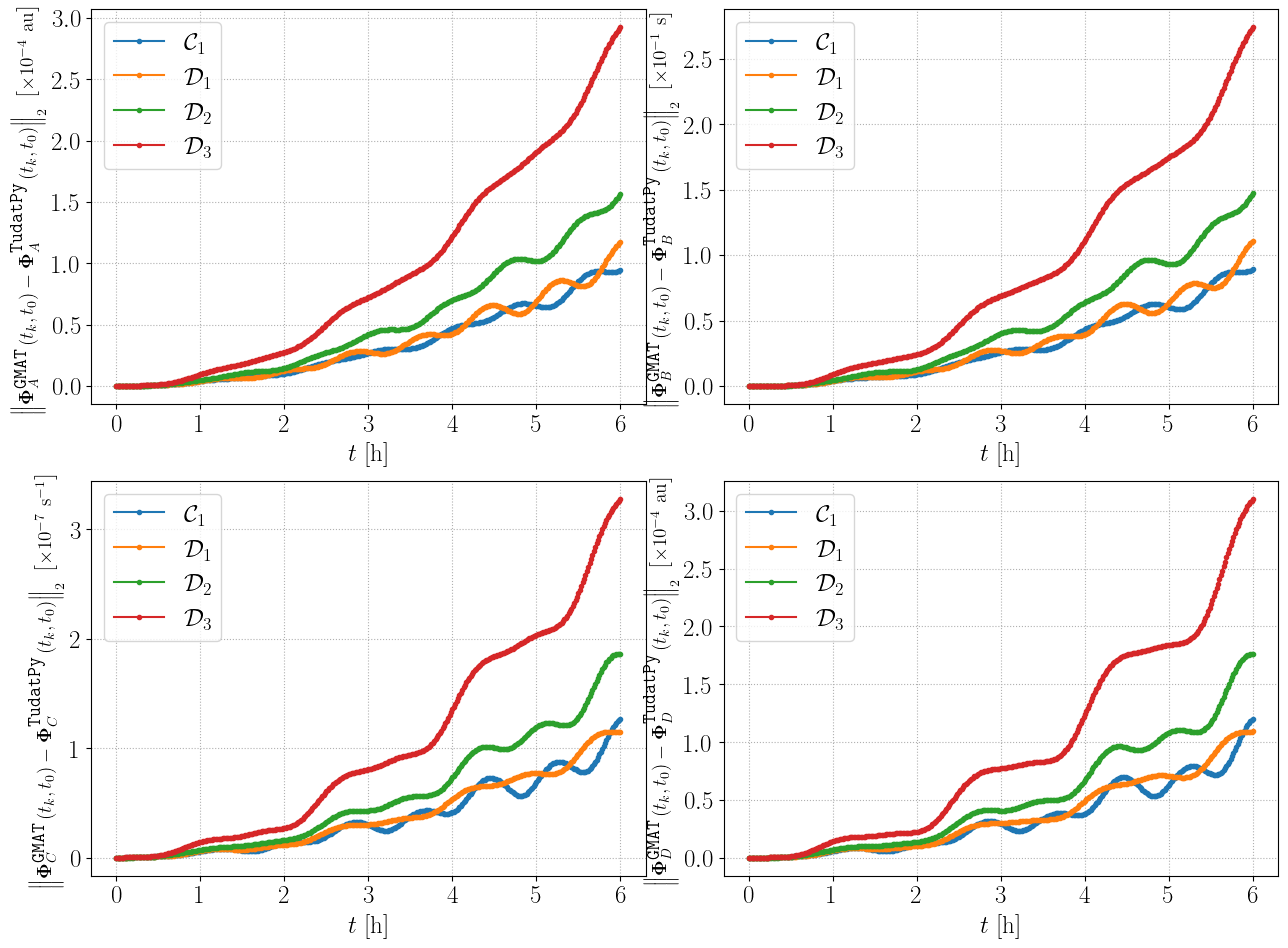

In [12]:
dev_STMA_chief, dev_STMB_chief, dev_STMC_chief, dev_STMD_chief = [], [], [], []
dev_STMA_deputy1, dev_STMB_deputy1, dev_STMC_deputy1, dev_STMD_deputy1 = [], [], [], []
dev_STMA_deputy2, dev_STMB_deputy2, dev_STMC_deputy2, dev_STMD_deputy2 = [], [], [], []
dev_STMA_deputy3, dev_STMB_deputy3, dev_STMC_deputy3, dev_STMD_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_STMA_chief.append(np.linalg.norm(data_gmat_STM['Chief1.OrbitSTM'][idx][0:3, 0:3] - data_tudatpy_STM['STM_chief'][idx][0:3, 0:3], ord=2))
    dev_STMB_chief.append(np.linalg.norm(data_gmat_STM['Chief1.OrbitSTM'][idx][0:3, 3:6] - data_tudatpy_STM['STM_chief'][idx][0:3, 3:6], ord=2))
    dev_STMC_chief.append(np.linalg.norm(data_gmat_STM['Chief1.OrbitSTM'][idx][3:6, 0:3] - data_tudatpy_STM['STM_chief'][idx][3:6, 0:3], ord=2))
    dev_STMD_chief.append(np.linalg.norm(data_gmat_STM['Chief1.OrbitSTM'][idx][3:6, 3:6] - data_tudatpy_STM['STM_chief'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy1.append(np.linalg.norm(data_gmat_STM['Deputy1.OrbitSTM'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy1'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy1.append(np.linalg.norm(data_gmat_STM['Deputy1.OrbitSTM'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy1'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy1.append(np.linalg.norm(data_gmat_STM['Deputy1.OrbitSTM'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy1'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy1.append(np.linalg.norm(data_gmat_STM['Deputy1.OrbitSTM'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy1'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy2.append(np.linalg.norm(data_gmat_STM['Deputy2.OrbitSTM'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy2'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy2.append(np.linalg.norm(data_gmat_STM['Deputy2.OrbitSTM'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy2'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy2.append(np.linalg.norm(data_gmat_STM['Deputy2.OrbitSTM'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy2'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy2.append(np.linalg.norm(data_gmat_STM['Deputy2.OrbitSTM'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy2'][idx][3:6, 3:6], ord=2))
    
    dev_STMA_deputy3.append(np.linalg.norm(data_gmat_STM['Deputy3.OrbitSTM'][idx][0:3, 0:3] - data_tudatpy_STM['STM_deputy3'][idx][0:3, 0:3], ord=2))
    dev_STMB_deputy3.append(np.linalg.norm(data_gmat_STM['Deputy3.OrbitSTM'][idx][0:3, 3:6] - data_tudatpy_STM['STM_deputy3'][idx][0:3, 3:6], ord=2))
    dev_STMC_deputy3.append(np.linalg.norm(data_gmat_STM['Deputy3.OrbitSTM'][idx][3:6, 0:3] - data_tudatpy_STM['STM_deputy3'][idx][3:6, 0:3], ord=2))
    dev_STMD_deputy3.append(np.linalg.norm(data_gmat_STM['Deputy3.OrbitSTM'][idx][3:6, 3:6] - data_tudatpy_STM['STM_deputy3'][idx][3:6, 3:6], ord=2))
    
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 2, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks
    
# Plot submatrix errors
axs[0, 0].plot(t, np.array(dev_STMA_chief) * 1e4, '.-', label='$\mathcal{C}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy1) * 1e4, '.-', label='$\mathcal{D}_1$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy2) * 1e4, '.-', label='$\mathcal{D}_2$')
axs[0, 0].plot(t, np.array(dev_STMA_deputy3) * 1e4, '.-', label='$\mathcal{D}_3$')
axs[0, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 0].set_ylabel("$\left\|\mathbf{\Phi}_A^\\texttt{GMAT} \left(t_k, t_0\\right) - \mathbf{\Phi}_A^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-4} \ \mathrm{au}\\right]$", fontsize=14)
axs[0, 0].grid(linestyle=':')
axs[0, 0].legend(fontsize=18)

axs[0, 1].plot(t, np.array(dev_STMB_chief) * 1e1, '.-', label='$\mathcal{C}_1$')
axs[0, 1].plot(t, np.array(dev_STMB_deputy1) * 1e1, '.-', label='$\mathcal{D}_1$')
axs[0, 1].plot(t, np.array(dev_STMB_deputy2) * 1e1, '.-', label='$\mathcal{D}_2$')
axs[0, 1].plot(t, np.array(dev_STMB_deputy3) * 1e1, '.-', label='$\mathcal{D}_3$')
axs[0, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[0, 1].set_ylabel("$\left\|\mathbf{\Phi}_B^\\texttt{GMAT} \left(t_k, t_0\\right) - \mathbf{\Phi}_B^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-1} \ \mathrm{s}\\right]$", fontsize=14)
axs[0, 1].grid(linestyle=':')
axs[0, 1].legend(fontsize=18)

axs[1, 0].plot(t, np.array(dev_STMC_chief) * 1e7, '.-', label='$\mathcal{C}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy1) * 1e7, '.-', label='$\mathcal{D}_1$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy2) * 1e7, '.-', label='$\mathcal{D}_2$')
axs[1, 0].plot(t, np.array(dev_STMC_deputy3) * 1e7, '.-', label='$\mathcal{D}_3$')
axs[1, 0].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 0].set_ylabel("$\left\|\mathbf{\Phi}_C^\\texttt{GMAT} \left(t_k, t_0\\right) - \mathbf{\Phi}_C^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-7} \ \mathrm{s}^{-1}\\right]$", fontsize=14)
axs[1, 0].grid(linestyle=':')
axs[1, 0].legend(fontsize=18)

axs[1, 1].plot(t, np.array(dev_STMD_chief) * 1e4, '.-', label='$\mathcal{C}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy1) * 1e4, '.-', label='$\mathcal{D}_1$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy2) * 1e4, '.-', label='$\mathcal{D}_2$')
axs[1, 1].plot(t, np.array(dev_STMD_deputy3) * 1e4, '.-', label='$\mathcal{D}_3$')
axs[1, 1].set_xlabel("$t$ [h]", fontsize=18)
axs[1, 1].set_ylabel("$\left\|\mathbf{\Phi}_D^\\texttt{GMAT} \left(t_k, t_0\\right) - \mathbf{\Phi}_D^\\texttt{TudatPy} \left(t_k, t_0\\right)\\right\|_2 \ \left[\\times 10^{-4} \ \mathrm{au}\\right]$", fontsize=14)
axs[1, 1].grid(linestyle=':')
axs[1, 1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_gmat_tudatpy.png', dpi=300)
plt.show()